In [1]:
!rm -rf /content/Split_data

In [3]:
!unzip -q '/content/drive/MyDrive/custom model/Split_data.zip' -d /content/

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

In [5]:
training_data_path =  '/content/Split_data/Train/Group_5'
validation_data_path = '/content/Split_data/Validation/Group_5'

In [6]:
os.listdir(training_data_path)

['chapati', 'chicken_curry', 'cheesecake']

In [7]:
os.listdir(validation_data_path)

['chapati', 'chicken_curry', 'cheesecake']

In [8]:
os.listdir(training_data_path+'/cheesecake')

['3526353.jpg',
 '407073.jpg',
 '1210888.jpg',
 '3709653.jpg',
 '2023629.jpg',
 '3616238.jpg',
 '3104089.jpg',
 '1349038.jpg',
 '2613188.jpg',
 '1086179.jpg',
 '568417.jpg',
 '1894630.jpg',
 '1428139.jpg',
 '1004515.jpg',
 '780915.jpg',
 '3568291.jpg',
 '2346728.jpg',
 '2294871.jpg',
 '3130983.jpg',
 '3775314.jpg',
 '1861327.jpg',
 '3033983.jpg',
 '2360871.jpg',
 '3288238.jpg',
 '1748224.jpg',
 '2750278.jpg',
 '1592451.jpg',
 '752480.jpg',
 '3155394.jpg',
 '2439835.jpg',
 '3096890.jpg',
 '2864249.jpg',
 '2172535.jpg',
 '1543937.jpg',
 '1983826.jpg',
 '2304139.jpg',
 '2175873.jpg',
 '476570.jpg',
 '1632762.jpg',
 '3439154.jpg',
 '1448697.jpg',
 '2709436.jpg',
 '1656986.jpg',
 '1092082.jpg',
 '1725779.jpg',
 '3530691.jpg',
 '1975932.jpg',
 '3772715.jpg',
 '1451380.jpg',
 '899194.jpg',
 '3131282.jpg',
 '3438209.jpg',
 '1435236.jpg',
 '3136381.jpg',
 '1142851.jpg',
 '1615141.jpg',
 '2828771.jpg',
 '2989533.jpg',
 '629317.jpg',
 '72295.jpg',
 '3320655.jpg',
 '736395.jpg',
 '1861855.jpg',
 '

In [9]:
os.listdir(training_data_path+'/chapati')

['157.jpg',
 '240.jpg',
 '266.jpg',
 'download.jpg',
 '121.jpg',
 '332.jpg',
 '038.jpg',
 '122.jpg',
 '239.jpg',
 '061.jpg',
 '036.jpg',
 '105.jpg',
 '139.jpg',
 '080.jpg',
 '148.jpg',
 '353.jpg',
 '316.jpg',
 '020.jpg',
 '263.jpg',
 '087.jpg',
 '303.jpg',
 '208.jpg',
 '374.jpg',
 '262.jpg',
 '346.jpg',
 'images.jpg',
 '235.jpg',
 '078.jpg',
 '125.jpg',
 '071.jpg',
 '136.jpg',
 '200.jpg',
 '057.jpg',
 '210.jpg',
 '320.jpg',
 '146.jpg',
 '248.jpg',
 '306.jpg',
 '111.jpg',
 '383.jpg',
 '223.jpg',
 '102.jpg',
 '180.jpg',
 '238.jpg',
 '056.jpg',
 '325.jpg',
 '091.jpg',
 '124.jpg',
 '104.jpg',
 '040.jpg',
 '115.jpg',
 '009.jpg',
 '172.jpg',
 '012.jpg',
 '253.jpg',
 '126.jpg',
 '324.jpg',
 '153.jpg',
 '177.jpg',
 '027.jpg',
 '188.jpg',
 '304.jpg',
 '103.jpg',
 '381.jpg',
 'images (20).jpg',
 '350.jpg',
 '384.jpg',
 'images (7).jpg',
 'images (12).jpg',
 '074.jpg',
 '004.jpg',
 '337.jpg',
 '391.jpg',
 'images (11).jpg',
 '293.jpg',
 '198.jpg',
 '268.jpg',
 '054.jpg',
 '334.jpg',
 '011.jpg',
 

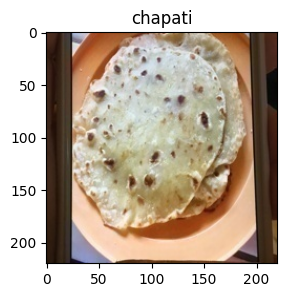

In [10]:
plt.figure(figsize=(5,3))
plt.title('chapati')
Baked_potato = plt.imread(training_data_path + '/chapati/012.jpg')
plt.imshow(Baked_potato)
plt.show()

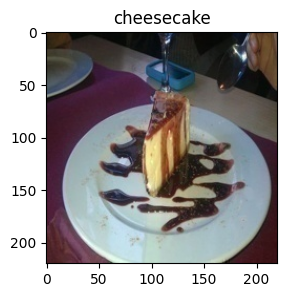

In [11]:
plt.figure(figsize=(5,3))
plt.title('cheesecake')
Donut = plt.imread(training_data_path + '/cheesecake/1210888.jpg')
plt.imshow(Donut)
plt.show()

**Image Data Augumentation**

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
training_set = ImageDataGenerator(rescale = 1 / 255,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_set = ImageDataGenerator(rescale = 1 / 255,rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [14]:
labels = ['chapati', 'chicken_curry', 'cheesecake']

In [15]:
train_input_data = training_set.flow_from_directory(training_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 20)

val_input_data = validation_set.flow_from_directory(validation_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 20)

Found 360 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [16]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.applications import ResNet50

In [17]:
import warnings
warnings.filterwarnings('ignore')

# Model architecture

model = Sequential()

# 1st Filter (or) Hidden layer
model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_uniform', padding='valid', strides=1, input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Filter (or) Hidden layer
model.add(Conv2D(32 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Filter (or) Hidden layer
model.add(Conv2D(8 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th Filter (or) Hidden layer
model.add(Conv2D(4 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(2,kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

In [18]:
num_classes = 3

resnet50_model = ResNet50(input_shape=(256, 256, 3),
                          weights='imagenet',
                          include_top=False)

for layer in resnet50_model.layers:
    layer.trainable = False

x = Flatten()(resnet50_model.output)
h1_out = Dense(128, kernel_initializer='he_uniform', activation='relu')(x)
h2_out = Dense(16, kernel_initializer='he_uniform', activation='relu')(h1_out)
output = Dense(num_classes, kernel_initializer='glorot_uniform', activation='softmax')(h2_out)

model = Model(inputs=resnet50_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
resnet50_model.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [21]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_input_data,
    epochs=50,
    validation_data=val_input_data
)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 685ms/step - accuracy: 0.3088 - loss: 1.2972 - val_accuracy: 0.3333 - val_loss: 1.1146
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 410ms/step - accuracy: 0.3181 - loss: 1.1127 - val_accuracy: 0.3500 - val_loss: 1.0975
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 469ms/step - accuracy: 0.2713 - loss: 1.1165 - val_accuracy: 0.4250 - val_loss: 1.0689
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 394ms/step - accuracy: 0.4086 - loss: 1.0765 - val_accuracy: 0.3500 - val_loss: 1.0904
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 456ms/step - accuracy: 0.3856 - loss: 1.0672 - val_accuracy: 0.4250 - val_loss: 1.0448
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 465ms/step - accuracy: 0.4500 - loss: 1.0201 - val_accuracy: 0.3833 - val_loss: 1.0914
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 393ms/step - accuracy: 0.4576 - loss: 1.0470 - val_accuracy: 0.4500 - val_loss: 0.9971
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 472ms/step - accuracy: 0.4387 - loss: 1.0176 - val_accuracy: 0

**test_model**

In [22]:
import cv2

In [23]:
labels

['chapati', 'chicken_curry', 'cheesecake']

In [24]:
train_input_data.class_indices

{'chapati': 0, 'chicken_curry': 1, 'cheesecake': 2}

In [25]:
def fun(path):
    global model, train_input_data

    # --- 1. Load and preprocess the image ---
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {path}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img_rgb, (256, 256))
    normalized = resized / 255.0
    input_image = np.expand_dims(normalized, axis=0)

    # --- 2. Predict using the model ---
    pred = model.predict(input_image, verbose=0)

    # --- 3. Get class mapping dynamically ---
    # train_input_data.class_indices gives {'Taco': 0, 'Pizza': 1, 'Baked_potato': 2}
    mapping = train_input_data.class_indices
    inv_map = {v: k for k, v in mapping.items()}

    # --- 4. Get predicted class ---
    predicted_index = int(np.argmax(pred))
    predicted_label = inv_map.get(predicted_index, "Unknown Class")

    # --- 5. Debugging info ---
    print("\nGroup class mapping:", mapping)
    print("Model output probabilities:", np.round(pred, 3))
    print(f"Predicted class index: {predicted_index}")
    print(f"Predicted label: {predicted_label}\n")

    # --- 6. Display image with prediction ---
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()


Group class mapping: {'chapati': 0, 'chicken_curry': 1, 'cheesecake': 2}
Model output probabilities: [[0.036 0.223 0.741]]
Predicted class index: 2
Predicted label: cheesecake



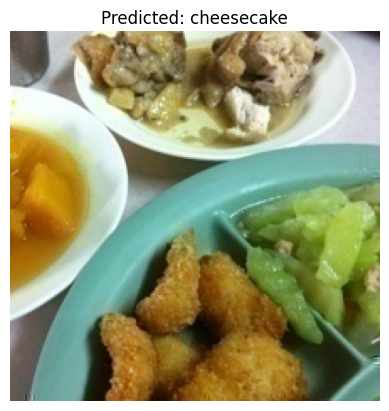

In [26]:
fun('/content/Split_data/Train/Group_5/chicken_curry/1149623.jpg')


Group class mapping: {'chapati': 0, 'chicken_curry': 1, 'cheesecake': 2}
Model output probabilities: [[0.01  0.231 0.759]]
Predicted class index: 2
Predicted label: cheesecake



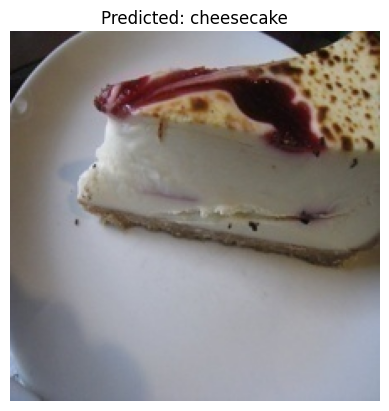

In [27]:
fun('/content/Split_data/Train/Group_5/cheesecake/1061232.jpg')

In [28]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [29]:
test_data_path = '/content/Split_data/Test/Group_5'

In [30]:
labels = ['chapati', 'chicken_curry', 'cheesecake']

In [31]:
test_set = ImageDataGenerator(rescale=1./255)

test_input_data = test_set.flow_from_directory(
    test_data_path,
    classes=labels,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=10,
    shuffle=False
)


Found 120 images belonging to 3 classes.


In [32]:
test_input_data.reset()
predictions = model.predict(test_input_data, verbose=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step


In [33]:
from sklearn.metrics import classification_report, accuracy_score

In [34]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_input_data.classes

In [35]:
y_pred = y_pred.astype(int)
y_true = y_true.astype(int)

In [36]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_input_data.class_indices.keys())))


Classification Report:

               precision    recall  f1-score   support

      chapati       0.70      0.57      0.63        40
chicken_curry       0.44      0.30      0.36        40
   cheesecake       0.50      0.75      0.60        40

     accuracy                           0.54       120
    macro avg       0.55      0.54      0.53       120
 weighted avg       0.55      0.54      0.53       120



In [37]:
accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.5417


In [38]:
from tensorflow.keras.models import load_model
model.save('/content/resnet50_group5_.h5')
model = load_model('/content/resnet50_group5_.h5')